<a href="https://colab.research.google.com/github/RafaelAnga/Artificial-Intelligence/blob/main/Social_Network_Ad_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN) Social Network Ad Prediction

## Project Overview
This project implements a K-Nearest Neighbors (KNN) classifier to predict whether users will purchase based on their age and estimated salary from social network ad data. The model helps identify potential customers for targeted advertising.


## Importing the libraries

In [1]:
# Import essential libraries for data manipulation, visualization, and numerical operations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# Mount Google Drive to access data (Colab-specific)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set working directory to access dataset
import os
os.chdir('/content/drive/MyDrive/Machine Learning/Classification Templates/DataSet')

#Lists the available directories
os.listdir()

['Social_Network_Ads.csv', 'churn_modelling.csv']

In [4]:
# Load the Social Network Ads dataset and split into features (X) and target (y)
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
# Split dataset into training (75%) and testing (25%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [6]:
# Feature Scaling: Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [7]:
# Initialize and train K-Nearest Neighbors Classifier
# n_neighbors=5: number of neighbors to consider
# metric='minkowski' with p=2: uses Euclidean distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [8]:
# Predict result for a single new customer (age=30, salary=87000)
classifier.predict(sc.transform([[30,87000]]))

array([0])

## Predicting the Test set results

In [9]:
# Make predictions on the entire test set
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

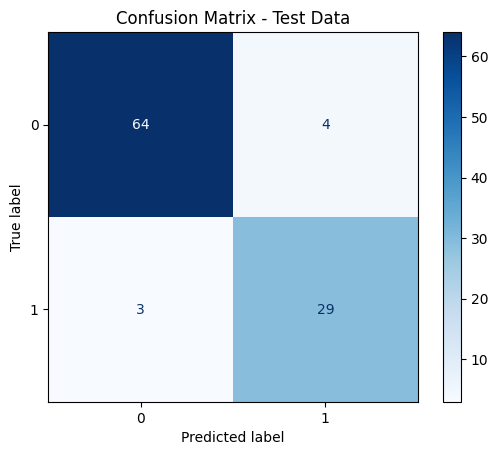

Accuracy score 93.0%


In [10]:
# Create and display confusion matrix for model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy score {ac*100}%")

## Visualising the Training set results

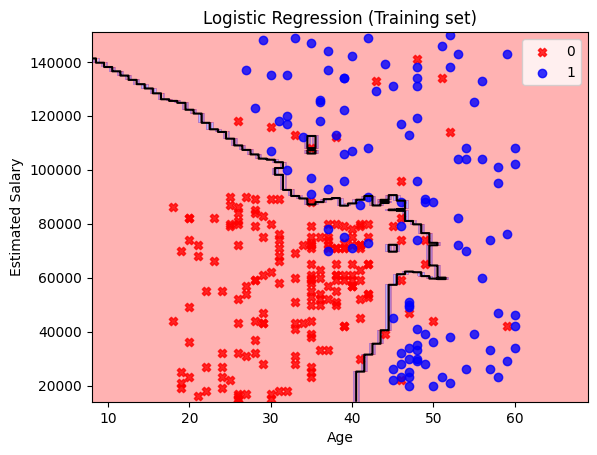

In [11]:
# Visualize Training set results with decision boundary
# First inverse transform the scaled data back to original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create mesh grid for plotting decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1)
)

# Calculate decision boundary
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.3, colors=['red', 'blue'])  # Lighter background fill for decision regions
plt.contour(X1, X2, Z, levels=[0.5], colors='black', linewidths=1.5)  # Solid black line for boundary

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot training points with different colors and markers for each class
for i, j in enumerate(np.unique(y_set)):
    color = 'red' if j == 0 else 'blue'
    marker = 'X' if j == 0 else 'o'
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=color, label=j, marker=marker, alpha=0.8)

# Add labels and show plot
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

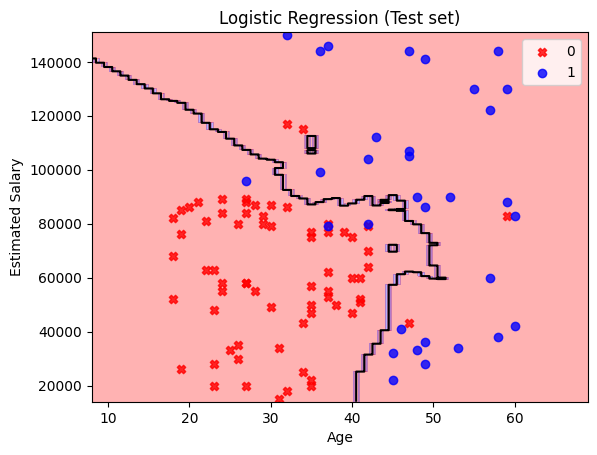

In [12]:
from matplotlib.colors import ListedColormap
# Use inverse-transformed data only if necessary
X_set, y_set = sc.inverse_transform(X_test), y_test

# Define a mesh grid with a larger step size to reduce computation
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1)
)

# Plot decision boundary with solid contour line
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.3, colors=['red', 'blue'])  # Lighter background fill for decision regions
plt.contour(X1, X2, Z, levels=[0.5], colors='black', linewidths=1.5)  # Solid black line for boundary

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot of the data points with different markers and colors
for i, j in enumerate(np.unique(y_set)):
    color = 'red' if j == 0 else 'blue'
    marker = 'X' if j == 0 else 'o'
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=color, label=j, marker=marker, alpha=0.8)

# Label and show plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#Purpose of the Project: K-Nearest Neighbors (KNN) Social Network Ad Prediction
###This project implements a K-Nearest Neighbors (KNN) classifier to predict whether users will purchase products based on social network advertising data, using age and estimated salary as key features.

**Workflow Overview:**

1. Dataset Preparation:
* The data contains user features (Age and Estimated Salary)
* Target variable is binary (0 for no purchase, 1 for purchase)
* Data is loaded from 'Social_Network_Ads.csv'

2. Data Preprocessing:
* Feature scaling using StandardScaler to normalize Age and Salary features
* This ensures all features contribute equally to distance calculations
* Data is split into 75% training and 25% testing sets

3. Model Implementation:
* KNN classifier is configured with 5 neighbors (n_neighbors=5)
* Uses Euclidean distance metric (minkowski with p=2)
* Model learns patterns based on the proximity of data points

4. Training and Prediction:
* Model is trained on the scaled training data
* Can make individual predictions for new customers
* Generates predictions for entire test set

5. Performance Evaluation:
* Confusion Matrix visualizes model performance
* Shows true positives, true negatives, false positives, and false negatives
* Accuracy score quantifies overall prediction success

6. Visualization:
* Decision boundary visualization for both training and test sets
* Red regions indicate predicted non-purchases
* Blue regions indicate predicted purchases
* Points marked with 'X' for non-purchases and 'o' for purchases
* Clear visualization of how model separates different classes

7. Business Applications:
* Helps target advertising to likely buyers
* Optimizes marketing budget allocation
* Identifies customer segments most likely to purchase
* Supports data-driven marketing decisions

****
This KNN implementation provides a robust foundation for predicting customer purchase behavior based on demographic and economic factors, enabling more effective targeted marketing strategies.